<a href="https://colab.research.google.com/github/j23-cs167/project-2-20aclaypool/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name:

Proposed Points (out of 25):

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I'm taking a dataset about housing prices from Kaggle. I took this data because it has two columns I would like to compare which is 'waterfront' and 'view'. A few other colums include: 'price', 'bedrooms',	'bathrooms',	'sqft_living', 'sqft_lot', and so on. 

I want to run a regression model to predict housing prices. However, I want to compare a model with 'waterfront' and 'view' to see which has a better R^2, MAE, and MSE.


https://www.kaggle.com/code/mayanksrivastava/predict-housing-prices-simple-linear-regression/data

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

*your answer here*

In [2]:
# load and prepare your data here
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

path = '/content/drive/MyDrive/CS167/datasets/kc_house_data.csv'
data = pd.read_csv(path)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.isna().any() #no missing data

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

# 3. Research

Put your code and your experiments here.

In [8]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

water_pred = ['bedrooms','bathrooms','sqft_living','sqft_lot', 'waterfront', 'yr_built']
water_target = ['price']

#view_pred = ['bedrooms','bathrooms','sqft_living','sqft_lot', 'view', 'yr_built']
#view_target = ['price']

train_data, test_data, train_sln, test_sln = train_test_split(data[water_pred], data[water_target], test_size = 0.2, random_state=41)

In [14]:
 #without any modifcations
forest = RandomForestRegressor(random_state=1)
forest.fit(train_data,train_sln)
predictions = forest.predict(test_data)

print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('MAE: ', metrics.mean_absolute_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

<ipython-input-14-d648271c5be5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_data,train_sln)


MSE:  51781499613.96446
MAE:  146060.44269903254
r2:  0.6845771944965882


<ipython-input-15-9c6050ee9078>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_data,train_sln)
<ipython-input-15-9c6050ee9078>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  curr_rf.fit(train_data,train_sln)
<ipython-input-15-9c6050ee9078>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  curr_rf.fit(train_data,train_sln)
<ipython-input-15-9c6050ee9078>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  curr_rf.fit(train_data,train_sln)
<ipython-input-15-9c6050ee9078>:12: DataConversionWarning: A column-vector y was passed when a

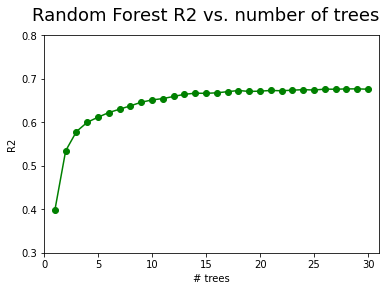

In [15]:
#NORM DATA!
import matplotlib.pyplot as plt
forest = RandomForestRegressor()
forest.fit(train_data,train_sln)
predictions = forest.predict(test_data)

def tune_number_of_trees(n_estimator_values):
    rf_r2 = []

    for n in n_estimator_values:

        curr_rf = RandomForestRegressor(n_estimators=n, random_state=1)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_accuracy = metrics.r2_score(test_sln,curr_predictions)
        rf_r2.append(curr_accuracy);


    plt.suptitle('Random Forest R2 vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('R2')
    plt.plot(n_estimator_values,rf_r2,'go-')
    plt.axis([0,n_estimator_values[-1]+1,.3,.8])

    plt.show()
    
tune_number_of_trees(range(1,31))

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

*your answer here*

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

*your answer here*